# Data Gatharing

In [1]:
import pandas as pd
import os
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## Sources
1- twitter-archive-enhanced.csv: Csv file provided by Udacity as a physical file, it contains archived all tweets of the account till 2017 contains info about tweet id, numerator, …will be opened using read_csv

2-image-predictions.tsv:Available through download from url: url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv',,, downloaded using requests lib, it contains results of image prediction programs run over the images of the tweets that has images

3- More data available like (retweet_count, and favored_count) through Tweeter API using Tweepy lib

In [164]:
##################### 1- Read twitter_archive_enhanced.csv and save it in dataframe 
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

archive_df.shape

(2356, 17)

In [13]:
########## 2- get the file twitter_archive_enhanced.csv from URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
######### using Requests library

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response =requests.get(url)

with open(os.path.join(os.getcwd(),url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)

##################### Read the file and save it in dataframe  

image_predictions_df = pd.read_csv(url.split('/')[-1], sep='\t')

image_predictions_df.shape

(2075, 12)

In [165]:
##################### Read the file and save it in dataframe  
######### This code is to reload the image_predictions_df without run the download again

image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

image_predictions_df.shape

(2075, 12)

In [14]:
########## 2- Use tweeter API to get tweet_json.txt file by
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

##################### use t_archive_df as refernce to get tweet_id to be read

tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

2356

In [8]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success
551: 804738756058218496
Success


Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809

Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
1064: 741067306818797568
Success
10

Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
13

Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
15

Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
18

Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
20

Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
23

In [44]:
### Test and read the json files keys
with open ('tweet_json.txt','r') as file:
    for line in file:
        content_all = json.loads(line)
        content_user = json.loads(line)['user']
        user_id = json.loads(line)['user']['id']
        media_url= json.loads(line)['entities']['media'][0]['media_url']
        break
media_url

'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg'

In [166]:
###### Create the api_df from the json_file
dif_list=[]
feild_list={'created_at','id','full_text',}
with open ('tweet_json.txt','r') as file:
    for line in file:
        try:
            media_url= json.loads(line)['entities']['media'][0]['media_url']
        except Exception as e:
            media_url = 'NA'
        try:
            media_url_https = json.loads(line)['entities']['media'][0]['media_url_https'],
        except Exception as e:
            media_url_https = 'NA'  
        try:
            media_type = json.loads(line)['entities']['media'][0]['type']
        except Exception as e:
            media_type = 'NA'
            
        dif_list.append({'created_at':json.loads(line)['created_at'],
        't_id':json.loads(line)['id'],
        'full_text':json.loads(line)['full_text'],
        'entities_media_url':media_url,
        'entities_media_url_https': media_url_https,
        'entities_media_type': media_type,
        'source':json.loads(line)['source'],
        'in_reply_to_status_id':json.loads(line)['in_reply_to_status_id'],
        'in_reply_to_user_id':json.loads(line)['in_reply_to_user_id'],
        'user_id' : json.loads(line)['user']['id'],
        'user_name' : json.loads(line)['user']['name'],
        'user_screen_name' : json.loads(line)['user']['screen_name'],
        'user_location' : json.loads(line)['user']['location'],
        'user_description' : json.loads(line)['user']['description'],
        'user_followers_count' : json.loads(line)['user']['followers_count'],
        'user_friends_count' : json.loads(line)['user']['friends_count'],
        'user_favourites_count' : json.loads(line)['user']['favourites_count'],
        'retweet_count' : json.loads(line)['retweet_count'],
        'favorite_count' : json.loads(line)['favorite_count'],
        'favorited' : json.loads(line)['favorited'],
        'retweeted' : json.loads(line)['retweeted']})
api_df=pd.DataFrame(dif_list)
api_df.head(5)
        

,created_at,entities_media_type,entities_media_url,entities_media_url_https,favorite_count,favorited,full_text,in_reply_to_status_id,in_reply_to_user_id,retweet_count,...,source,t_id,user_description,user_favourites_count,user_followers_count,user_friends_count,user_id,user_location,user_name,user_screen_name
0,Tue Aug 01 16:23:56 +0000 2017,photo,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,(https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.j...,35460,False,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,7485,...,"<a href=""http://twitter.com/download/iphone"" r...",892420643555336193,Your Only Source For Professional Dog Ratings ...,145876,8877498,19,4196983835,Adoptable Dogs ➡️,WeRateDogs®,dog_rates
1,Tue Aug 01 00:17:27 +0000 2017,photo,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,(https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.j...,30695,False,This is Tilly. She's just checking pup on you....,NaN,NaN,5557,...,"<a href=""http://twitter.com/download/iphone"" r...",892177421306343426,Your Only Source For Professional Dog Ratings ...,145876,8877498,19,4196983835,Adoptable Dogs ➡️,WeRateDogs®,dog_rates
2,Mon Jul 31 00:18:03 +0000 2017,photo,http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,(https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.j...,23086,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,3680,...,"<a href=""http://twitter.com/download/iphone"" r...",891815181378084864,Your Only Source For Professional Dog Ratings ...,145876,8877498,19,4196983835,Adoptable Dogs ➡️,WeRateDogs®,dog_rates
3,Sun Jul 30 15:58:51 +0000 2017,photo,http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,(https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.j...,38744,False,This is Darla. She commenced a snooze mid meal...,NaN,NaN,7664,...,"<a href=""http://twitter.com/download/iphone"" r...",891689557279858688,Your Only Source For Professional Dog Ratings ...,145876,8877498,19,4196983835,Adoptable Dogs ➡️,WeRateDogs®,dog_rates
4,Sat Jul 29 16:00:24 +0000 2017,photo,http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,(https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.j...,37024,False,This is Franklin. He would like you to stop ca...,NaN,NaN,8267,...,"<a href=""http://twitter.com/download/iphone"" r...",891327558926688256,Your Only Source For Professional Dog Ratings ...,145876,8877498,19,4196983835,Adoptable Dogs ➡️,WeRateDogs®,dog_rates


# OUTPUTS
Data gatharing finished and now we have 3 data frames
1- 'archive_df' that hold All archived data provided by Udacity
2- 'image_predictions_df' that hold image prediction data downloaded from Udacity web site using requests.
3- 'api_df' that hold all data extracted from Tweeter_json.txt file generted by using tweeter API

# Data Assessment

In [167]:
#Visual assessment
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [53]:
archive_df[archive_df['tweet_id']== 892420643555336193]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [54]:
archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [56]:
archive_df[archive_df['rating_numerator'] == 75]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


In [59]:
archive_df['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Daisy          7
Toby           7
Bailey         7
Buddy          7
Bella          6
Dave           6
Jack           6
Leo            6
Milo           6
Rusty          6
Jax            6
Stanley        6
Scout          6
Koda           6
Oscar          6
Louis          5
            ... 
Cora           1
Gerbald        1
Geoff          1
Dewey          1
Lili           1
Winifred       1
Kloey          1
Flurpson       1
such           1
BeBe           1
Sparky         1
Grizzwald      1
Jarvis         1
Beckham        1
Damon          1
Charl          1
Craig          1
Lance          1
Rhino          1
Skye           1
Jeb            1
Ricky          1
Buddah         1
Crawford       1
Blipson        1
Emanuel        1
Ulysses        1
Tommy         

In [60]:
archive_df[archive_df['name'] == 'the']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1527,690360449368465409,NaN,NaN,2016-01-22 02:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Stop sending in lobsters. This is the final wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690360449...,9,10,the,None,None,None,None
1603,685943807276412928,NaN,NaN,2016-01-09 21:58:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the newly formed pupper a capella grou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685943807...,8,10,the,None,None,pupper,None
1797,677269281705472000,NaN,NaN,2015-12-16 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest pupper I've ever seen. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677269281...,10,10,the,None,None,pupper,None
1815,676613908052996102,NaN,NaN,2015-12-15 04:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the saddest/sweetest/best picture I've...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676613908...,12,10,the,None,None,None,None
2037,671561002136281088,NaN,NaN,2015-12-01 05:26:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671561002...,13,10,the,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None


In [6]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [61]:
image_predictions_df['tweet_id'].value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [7]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 21 columns):
created_at                  2331 non-null object
entities_media_type         2331 non-null object
entities_media_url          2331 non-null object
entities_media_url_https    2331 non-null object
favorite_count              2331 non-null int64
favorited                   2331 non-null bool
full_text                   2331 non-null object
in_reply_to_status_id       77 non-null float64
in_reply_to_user_id         77 non-null float64
retweet_count               2331 non-null int64
retweeted                   2331 non-null bool
source                      2331 non-null object
t_id                        2331 non-null int64
user_description            2331 non-null object
user_favourites_count       2331 non-null int64
user_followers_count        2331 non-null int64
user_friends_count          2331 non-null int64
user_id                     2331 non-null int64
user_location           

In [9]:
api_df['user_name'].value_counts()

WeRateDogs®    2331
Name: user_name, dtype: int64

In [10]:
api_df['user_screen_name'].value_counts()

dog_rates    2331
Name: user_screen_name, dtype: int64

In [11]:
api_df['user_location'].value_counts()

Adoptable Dogs ➡️    2331
Name: user_location, dtype: int64

In [12]:
api_df['user_id'].value_counts()

4196983835    2331
Name: user_id, dtype: int64

In [13]:
api_df['user_description'].value_counts()

Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀    2331
Name: user_description, dtype: int64

In [15]:
api_df['full_text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [16]:
api_df['entities_media_type'].value_counts()

photo    2059
NA        272
Name: entities_media_type, dtype: int64

# Assessment:

Quality:

archive_df:
1- 'tweet_id' need to be object not int

2-	Missing values in (in_reply_to_status_id, in_reply_to_status_id,     in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

Note: Not a NAN quality issue but we Need to select only tweets that contains null values in (in_reply_to_status_id, in_reply_to_status_id,     in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp ) to make sure that they are original tweets (not retweets, not replies).
            
3-	Missing value in expanded_urls seems to be tweets with no images as can’t find them in the image_prediction… we need only tweets with images.

4-	'timestamp' data type object not datetime.

5-	Doge 'name' contains values like (a, Al , an, Bo, Doc, the, all, such, very, this..) need to be None

predictions_df: 
6-	tweet_id need to be object.

7-	Non descriptive column names (P1, P2, P3...).

8-	 P1, P2, P3 contain capitalized and non-capitalized names.

9-	 Only 2075 record compared to 2356 in archive_df.

api_df:

10-	t_id need to be oject not int.

11-	 number of records 2331 near the archive_df only few missing


Tidiness:

archive_df: 
1-	 Value are column name (doggo, floofer, pupper, puppo)

api_df: 
2-	All ‘user’ info columns have no interesting data all has one value (user_description, user_favourites_count, user_followers_count, user_friends_count, user_id, user_location, user_name, user_screen_name)

3-	It is not considerd as observational unit so, Need to be merged with the archive_df.

4-	Contain lots of duplicated columns with archive_df and prediction_df 

    List of duplicated columns in api_df:

    api_df[‘created_at’] = archive_df[‘timestamp’]

    api_df[‘full_text’]= archive_df[‘text’]

    api_df[‘in_reply_to_status_id’] = archive_df[‘in_reply_to_status_id’]

    api_df[‘in_reply_to_user_id’]= archive_df[‘in_reply_to_user_id’]

    api_df[‘source’]= archive_df[‘source’]

    api_df[‘t_id’]= archive_df[‘tweet_id’]

    api_df[‘entities_media_url’]=predictions_df[‘jpg_url’]

    api_df[‘entities_media_url_https’]=predictions_df[‘jpg_url’]

# Clean:

In [168]:
archive_Clean = archive_df.copy()
predictions_Clean = image_predictions_df.copy()
api_Clean = api_df.copy()

## Quality: Missing Data

Define

archive_df:
     1- Select only tweets that are in predictions_df (only with images)
     
     2- select only tweets with  null values in (in_reply_to_status_id,                 in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,               retweeted_status_user_id, retweeted_status_timestamp )
     
     3- Check if still any Missing value in expanded_urls.
     
     4- Remove rows not in api_dif

predictions_df: 

     4- Remove tweetes that are not in archive_df after cleaning archive_df.

api_df:

     5- Remove tweetes that are not in archive_df after cleaning archive_df.

All three tables must have same number of records

In [169]:
############## 1- Select only tweets that are in predictions_df (only with images)
############# Create a new feild cont_img to be 0 if no image and 1 if have image
archive_Clean['cont_img'] = 0
archive_Clean['cont_img'] = archive_Clean.loc[archive_Clean['tweet_id'].isin(predictions_Clean['tweet_id']), 'cont_img'] + 1
######### filter out data set with only that has images
archive_Clean = archive_Clean.query('cont_img == 1')

archive_Clean.shape

(2075, 18)

In [170]:
archive_Clean['json_file'] = 0
archive_Clean['json_file'] = archive_Clean.loc[archive_Clean['tweet_id'].isin(api_Clean['t_id']), 'json_file'] + 1
######### filter out data set with only that has images
archive_Clean = archive_Clean.query('json_file == 1')

archive_Clean.shape

(2059, 19)

In [171]:
###### 2- select only tweets with  null values in (in_reply_to_status_id,
####### in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,               
####### retweeted_status_user_id, retweeted_status_timestamp )
    
### set valiables with initial 0 and then replacesd with 1 if it is good tweet
archive_Clean['re_tweet'] = 0
archive_Clean['rep_tweet'] = 0

archive_Clean.loc[archive_Clean['retweeted_status_id'].isnull(), 're_tweet'] = 1
archive_Clean.loc[archive_Clean['in_reply_to_status_id'].isnull(), 'rep_tweet'] = 1

archive_Clean = archive_Clean.query('re_tweet == 1')
archive_Clean = archive_Clean.query('rep_tweet == 1')


In [172]:
##Test : 
archive_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      1964 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1964 non-null object
source                        1964 non-null object
text                          1964 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1964 non-null object
rating_numerator              1964 non-null int64
rating_denominator            1964 non-null int64
name                          1964 non-null object
doggo                         1964 non-null object
floofer                       1964 non-null object
pupper                        1964 non-null object
puppo                         1964 non-null object
cont_img                      1964 non-n

In [173]:
### drop un neccessary columns
archive_Clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 
                    'retweeted_status_id','retweeted_status_user_id',
                    'retweeted_status_timestamp','cont_img','re_tweet',
                    'rep_tweet','json_file'], axis = 1, inplace = True)

In [174]:
archive_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
dtypes: int64(3), object(9)
memory usage: 199.5+ KB


In [175]:
#predictions_df:
# Remove tweetes that are not in archive_df after cleaning archive_df.
predictions_Clean['nre_tweeet'] = 0
predictions_Clean['nre_tweeet']  = predictions_Clean.loc[predictions_Clean['tweet_id'].isin(archive_Clean['tweet_id']), 'nre_tweeet'] + 1
######### filter out data set with only that not retweet
predictions_Clean = predictions_Clean.query('nre_tweeet == 1')

#api_df:
#Remove tweetes that are not in archive_df after cleaning archive_df.

api_Clean['nre_tweeet'] = 0
api_Clean['nre_tweeet']  = api_Clean.loc[api_Clean['t_id'].isin(archive_Clean['tweet_id']), 'nre_tweeet'] + 1
######### filter out data set with only that not retweet
api_Clean = api_Clean.query('nre_tweeet == 1')


In [176]:
##Test :
predictions_Clean.shape

(1964, 13)

In [177]:
##Test :
api_Clean.shape

(1964, 22)

In [178]:
### drop un neccessary columns
predictions_Clean.drop(['nre_tweeet'],axis = 1, inplace = True)
api_Clean.drop(['nre_tweeet'],axis = 1, inplace = True)

# Tidiness

Define

archive_df: 
 1- create one column with name 'Dog_class' that take the value of these 3 columns (doggo, floofer, pupper, puppo) that is not equal to null (this column after being created could need second itteration of cleaning.

api_df: 
2-	drop columns (user_description, user_favourites_count, user_followers_count, user_friends_count, user_id, user_location, user_name, user_screen_name)

3&4  map (favorite_count,favorited,retweet_count,retweeted) from api_df to archive_df

In [179]:
### 1- create one column with name 'dog_class' that take the value of these 3 columns (doggo, floofer, pupper, puppo) that is not equal to null (this column after being created could need second itteration of cleaning.
## replace non wit '' then concatenate
archive_Clean['dog_class'] = archive_Clean.doggo.str.replace('None' ,'') + archive_Clean.floofer.str.replace('None' ,'') + archive_Clean.pupper.str.replace('None' ,'') + archive_Clean.puppo.str.replace('None' ,'')

archive_Clean['dog_class'].value_counts()
##### still need clean

                1662
pupper           201
doggo             62
puppo             22
doggopupper        8
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_class, dtype: int64

In [180]:
## 2- drop columns from api_Clean  (user_description, user_favourites_count, 
#user_followers_count, user_friends_count, user_id, user_location, user_name,
#user_screen_name)

api_Clean.drop(['user_description','user_favourites_count', 
                    'user_followers_count','user_friends_count',
                    'user_id','user_location','user_name',
                    'user_screen_name'], axis = 1, inplace = True)

In [181]:
api_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2330
Data columns (total 13 columns):
created_at                  1964 non-null object
entities_media_type         1964 non-null object
entities_media_url          1964 non-null object
entities_media_url_https    1964 non-null object
favorite_count              1964 non-null int64
favorited                   1964 non-null bool
full_text                   1964 non-null object
in_reply_to_status_id       0 non-null float64
in_reply_to_user_id         0 non-null float64
retweet_count               1964 non-null int64
retweeted                   1964 non-null bool
source                      1964 non-null object
t_id                        1964 non-null int64
dtypes: bool(2), float64(2), int64(3), object(6)
memory usage: 188.0+ KB


In [182]:
## 3&4  map (favorite_count,favorited,retweet_count,retweeted)  from api_df to archive_df

archive_Clean['favorite_count'] = archive_Clean['tweet_id'].map(api_Clean.set_index('t_id')['favorite_count'])
archive_Clean['favorited'] = archive_Clean['tweet_id'].map(api_Clean.set_index('t_id')['favorited'])
archive_Clean['retweet_count'] = archive_Clean['tweet_id'].map(api_Clean.set_index('t_id')['retweet_count'])
archive_Clean['retweeted'] = archive_Clean['tweet_id'].map(api_Clean.set_index('t_id')['retweeted'])

archive_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
dog_class             1964 non-null object
favorite_count        1964 non-null int64
favorited             1964 non-null bool
retweet_count         1964 non-null int64
retweeted             1964 non-null bool
dtypes: bool(2), int64(5), object(10)
memory usage: 249.3+ KB


# Quality: Data types issue

archive_df:
1- 'tweet_id' need to be object not int

4-	'timestamp' data type object not datetime.

predictions_df: 
6-	tweet_id need to be object.

In [183]:
archive_Clean.tweet_id = archive_Clean.tweet_id.astype(object)
archive_Clean.timestamp = pd.to_datetime(archive_Clean.timestamp)
predictions_Clean.tweet_id = predictions_Clean.tweet_id.astype(object)

In [184]:
#test 
archive_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null datetime64[ns]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
dog_class             1964 non-null object
favorite_count        1964 non-null int64
favorited             1964 non-null bool
retweet_count         1964 non-null int64
retweeted             1964 non-null bool
dtypes: bool(2), datetime64[ns](1), int64(4), object(10)
memory usage: 249.3+ KB


In [185]:
#test
predictions_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1964 non-null object
jpg_url     1964 non-null object
img_num     1964 non-null int64
p1          1964 non-null object
p1_conf     1964 non-null float64
p1_dog      1964 non-null bool
p2          1964 non-null object
p2_conf     1964 non-null float64
p2_dog      1964 non-null bool
p3          1964 non-null object
p3_conf     1964 non-null float64
p3_dog      1964 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.2+ KB


# Qality: Data values & headers Issue

Define

archive_df:

** new issue: dog_class reolace 'doggopupper' with doggo_pupper,'doggopuppo'  with 'doggo_puppo' and 'doggofloofer' with 'doggo_floofer' and '' with Non

5-	apply regex to fined name for Doge 'name' contains values (a, Al , an, Bo, Doc, the, all, such, very, this) and replce all if not found with Non

predictions_df: 

7-	Rename (P1 to breed1, P2 breed2, breed3).
   Rename (p1_conf to confidence1, ...
   Rename (p1_dog to is_breed1, ...

8-	 P1.lower(), P2.lower(), P3.lower()

In [186]:
##### clean dog_class it a bit
#** new issue: dog_class reolace 'doggopupper' with doggo_pupper,'doggopuppo'  
#with 'doggo_puppo' and 'doggofloofer' with 'doggo_floofer' and '' with Non
#
archive_Clean.loc[archive_Clean.dog_class == 'doggopupper', 'dog_class'] = 'doggo-pupper'
archive_Clean.loc[archive_Clean.dog_class == 'doggofloofer', 'dog_class'] ='doggo_floofer'
archive_Clean.loc[archive_Clean.dog_class == 'doggopuppo', 'dog_class'] = 'doggo_puppo'
archive_Clean.loc[archive_Clean.dog_class == '', 'dog_class'] = 'Non'

archive_Clean['dog_class'].value_counts()

Non              1662
pupper            201
doggo              62
puppo              22
doggo-pupper        8
floofer             7
doggo_puppo         1
doggo_floofer       1
Name: dog_class, dtype: int64

In [187]:
## drop columns (doggo, floofer,pupper,puppo) from archive_Clean 

archive_Clean.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

In [188]:
## apply regex to fined name for Doge 'name' contains values (a, Al , an, Bo, Doc, the, all, such, very, this) 
##and replce all if not found with Non

archive_Clean['new_name']= archive_Clean['name']

pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_Clean.iterrows():  
    try:
        if row['name'] in ["a", "Al" , "an", "Bo", "Doc", "the", "all", "such", "very", "this"]:
            c_name = re.findall(pattern, row['text'])[0]
            archive_Clean.loc[index,'new_name'] = archive_Clean.loc[index,'new_name'].replace('a', c_name)
        #elif row['name'] == 'an':
        #    c_name = re.findall(pattern, row['text'])[0]
        #    archive_Clean.loc[index,'new_name'] = archive_Clean.loc[index,'new_name'].replace('an', c_name)
    except IndexError:
        archive_Clean.loc[index,'new_name'] = np.nan           
#archive_clean.name.value_counts(dropna = False)

In [189]:
##test that new anme actualy contain new names
archive_Clean['new_name'][archive_Clean['name'] == 'a']

56            NaN
649           NaN
801           NaN
1002          NaN
1004          NaN
1017          NaN
1049          NaN
1193          NaN
1207          NaN
1340          NaN
1351          NaN
1361          NaN
1368          NaN
1382          NaN
1499          NaN
1737          NaN
1785          NaN
1853        Wylie
1854          NaN
1877          NaN
1878          NaN
1923          NaN
1941          NaN
1955          Kip
1994          NaN
2034        Jacob
2066        Rufus
2116        Spork
2125     Cherokee
2128        Hemry
2146      Alphred
2153          NaN
2161      Alfredo
2191        Leroi
2198          NaN
2211          NaN
2218         Chuk
2222          NaN
2235      Alfonso
2249       Cheryl
2255      Jessiga
2264        Klint
2273         Kohl
2287        Daryl
2304         Pepe
2311    Octaviath
2314         Johm
2327          NaN
2334          NaN
2347          NaN
2348          NaN
2350          NaN
2352          NaN
2353          NaN
2354          NaN
Name: new_

In [190]:
######## replace name with new name and drop new_name
archive_Clean['name']= archive_Clean['new_name']
archive_Clean.drop(['new_name'], axis=1, inplace=True)

In [191]:
##test
archive_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null datetime64[ns]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1901 non-null object
dog_class             1964 non-null object
favorite_count        1964 non-null int64
favorited             1964 non-null bool
retweet_count         1964 non-null int64
retweeted             1964 non-null bool
dtypes: bool(2), datetime64[ns](1), int64(4), object(6)
memory usage: 268.0+ KB


In [192]:
# P1.lower(), P2.lower(), P3.lower()

predictions_Clean['p1']=predictions_Clean['p1'].str.lower()
predictions_Clean['p2']=predictions_Clean['p2'].str.lower()
predictions_Clean['p3']=predictions_Clean['p3'].str.lower()


In [194]:
#test
predictions_Clean['p1'].value_counts()

golden_retriever             137
labrador_retriever            92
pembroke                      88
chihuahua                     78
pug                           54
chow                          41
samoyed                       39
pomeranian                    38
toy_poodle                    36
malamute                      29
cocker_spaniel                27
french_bulldog                25
chesapeake_bay_retriever      23
seat_belt                     21
miniature_pinscher            21
german_shepherd               20
siberian_husky                20
eskimo_dog                    18
maltese_dog                   18
staffordshire_bullterrier     18
shetland_sheepdog             18
cardigan                      17
teddy                         17
beagle                        17
shih-tzu                      17
rottweiler                    16
italian_greyhound             16
kuvasz                        15
lakeland_terrier              15
great_pyrenees                14
          

In [195]:
# Rename (P1 to Breed1, P2 Breed2, Breed3).
# Rename (p1_conf to confidence1, ...
# Rename (p1_dog to is_bread1, ...

predictions_Clean.rename(columns={'p1':'Breed1','p2':'Breed2','p3':'Breed3'}, inplace=True)
predictions_Clean.rename(columns={'p1_conf':'confidence1','p2_conf':'confidence2','p3_conf':'confidence3'}, inplace=True)
predictions_Clean.rename(columns={'p1_dog':'is_bread1','p2_dog':'is_bread2','p3_dog':'is_breed3'}, inplace=True)

In [196]:
predictions_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id       1964 non-null object
jpg_url        1964 non-null object
img_num        1964 non-null int64
Breed1         1964 non-null object
confidence1    1964 non-null float64
is_bread1      1964 non-null bool
Breed2         1964 non-null object
confidence2    1964 non-null float64
is_bread2      1964 non-null bool
Breed3         1964 non-null object
confidence3    1964 non-null float64
is_breed3      1964 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.2+ KB


In [197]:
#save in new datafiles
archive_Clean.to_csv('archive_Clean.csv', index=False)
predictions_Clean.to_csv('predictions_Clean.csv', index=False)
api_Clean.to_csv('api_Clean.csv', index=False)

In [2]:
archive_Clean_df = pd.read_csv('archive_Clean.csv')
predictions_Clean_df = pd.read_csv('predictions_Clean.csv')

In [13]:
master_df= pd.merge(archive_Clean_df, predictions_Clean_df, left_on='tweet_id', right_on='tweet_id')

In [14]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 24 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1901 non-null object
dog_class             1964 non-null object
favorite_count        1964 non-null int64
favorited             1964 non-null bool
retweet_count         1964 non-null int64
retweeted             1964 non-null bool
jpg_url               1964 non-null object
img_num               1964 non-null int64
Breed1                1964 non-null object
confidence1           1964 non-null float64
is_bread1             1964 non-null bool
Breed2                1964 non-null object
confidence2           1964 non-null float64
is_bread2             1964 non-null bool
Br

In [21]:
master_df.tweet_id = master_df.tweet_id.astype(object)
master_df.timestamp = pd.to_datetime(master_df.timestamp)

master_df['year']= master_df['timestamp'].dt.year
master_df['month']= master_df.timestamp.dt.month

master_df.year = master_df.year.astype('category')
master_df.month = master_df.month.astype('category')
master_df.img_num = master_df.month.astype('category')

In [22]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 26 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null datetime64[ns]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1901 non-null object
dog_class             1964 non-null object
favorite_count        1964 non-null int64
favorited             1964 non-null bool
retweet_count         1964 non-null int64
retweeted             1964 non-null bool
jpg_url               1964 non-null object
img_num               1964 non-null category
Breed1                1964 non-null object
confidence1           1964 non-null float64
is_bread1             1964 non-null bool
Breed2                1964 non-null object
confidence2           1964 non-null float64
is_bread2             1964 non-

In [24]:
master_df.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,confidence1,confidence2,confidence3
count,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1.964000e+03,1.964000e+03
mean,12.223014,10.479124,8156.428717,2407.515784,0.593928,1.346393e-01,6.028936e-02
std,41.708155,6.865424,11998.990148,4301.267257,0.272134,1.009430e-01,5.096697e-02
min,0.000000,2.000000,69.000000,11.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,1749.500000,538.000000,0.362775,5.352722e-02,1.619708e-02
50%,11.000000,10.000000,3678.500000,1166.000000,0.587357,1.173995e-01,4.947920e-02
75%,12.000000,10.000000,10176.750000,2750.250000,0.847062,1.955617e-01,9.162278e-02
max,1776.000000,170.000000,152886.000000,75671.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
master_df.year.value_counts()

2016    960
2015    654
2017    350
Name: year, dtype: int64

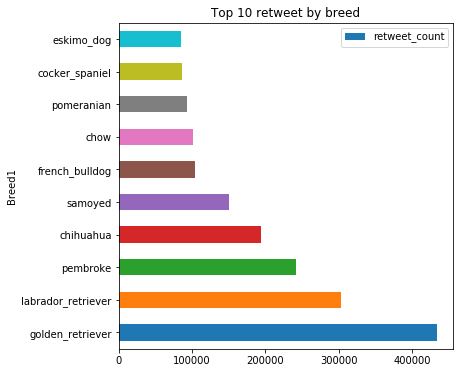

In [32]:
### plot top 10 bread3 retweets
avg_retweet_count_breed = master_df[master_df['is_bread1']].groupby('Breed1').retweet_count.sum().nlargest(10)
avg_retweet_count_breed.plot(kind='barh', title='Top 10 retweet by breed', figsize=(6,6))

plt.legend()

In [33]:
master_df[master_df['Breed1']=='golden_retriever']['jpg_url'].head(5)

14    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg
16    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg
17    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg
39    https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
41    https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg
Name: jpg_url, dtype: object

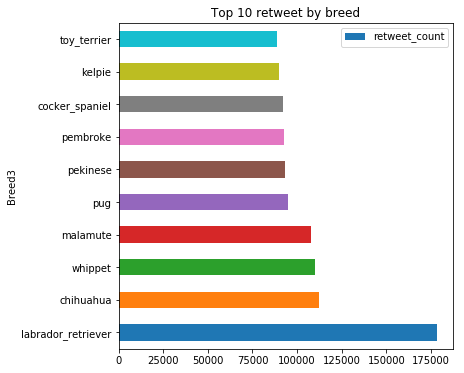

In [27]:
### plot top 10 bread3 retweets
avg_retweet_count_breed = master_df[master_df['is_breed3']].groupby('Breed3').retweet_count.sum().nlargest(10)
avg_retweet_count_breed.plot(kind='barh', title='Top 10 retweet by breed', figsize=(6,6))

plt.legend()

In [30]:
master_df[master_df['Breed3']=='labrador_retriever']['jpg_url'].head(5)

16     https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg
92     https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg
109    https://pbs.twimg.com/media/DAOmEZiXYAAcv2S.jpg
132    https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg
148    https://pbs.twimg.com/media/C9u7MtmV0AA741s.jpg
Name: jpg_url, dtype: object

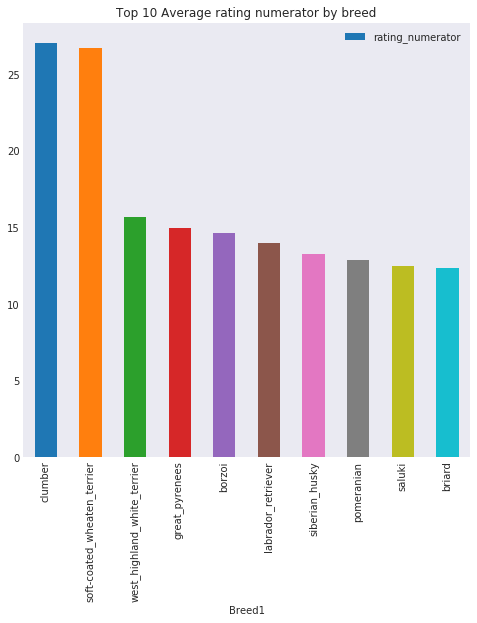

In [34]:
### plot top 10 bread1 average rating_numerator

sns.set_style("dark")

avg_retweet_count_breed = master_df[master_df['is_bread1']].groupby('Breed1').rating_numerator.mean().nlargest(10)
avg_retweet_count_breed.plot(kind='bar', title='Top 10 Average rating numerator by breed',figsize=(8,8))

plt.legend()
#plt.xlabel("Breed")
#plt.ylabel("Average rating numerator")

In [36]:
master_df[master_df['Breed1']=='pomeranian']['jpg_url'].head(5)

7      https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
249    https://pbs.twimg.com/media/C4uk0EWWQAAaZm1.jpg
306    https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg
313    https://pbs.twimg.com/media/C2UpLA-UcAEK_Fz.jpg
344    https://pbs.twimg.com/media/C1NXQ6NXUAEAxIQ.jpg
Name: jpg_url, dtype: object

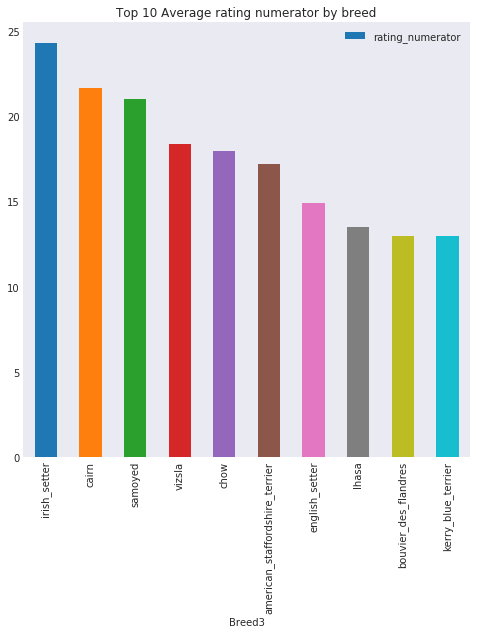

In [40]:
### plot top 10 bread1 average rating_numerator

sns.set_style("dark")

avg_retweet_count_breed = master_df[master_df['is_breed3']].groupby('Breed3').rating_numerator.mean().nlargest(10)
avg_retweet_count_breed.plot(kind='bar', title='Top 10 Average rating numerator by breed',figsize=(8,8))

plt.legend()
#plt.xlabel("Breed")
#plt.ylabel("Average rating numerator")

In [41]:
master_df[master_df['Breed3']=='chihuahua']['jpg_url'].head(5)

9     https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg
36    https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg
52    https://pbs.twimg.com/media/DDl8zzJW0AAisCJ.jpg
84    https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg
96    https://pbs.twimg.com/media/DBHOOfOXoAABKlU.jpg
Name: jpg_url, dtype: object

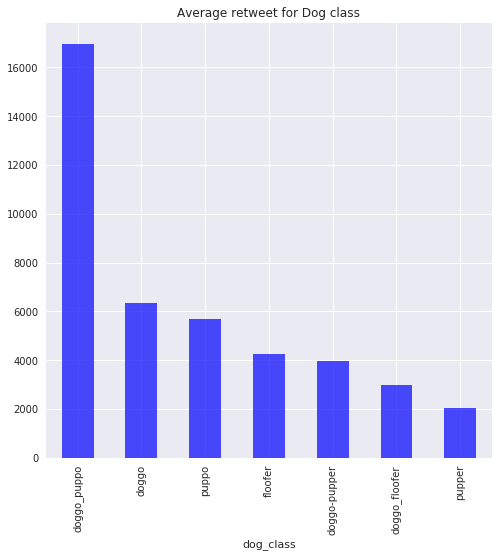

In [217]:
###### Plot average retweet by dog class

dog_class=master_df[master_df['dog_class'] != 'Non'].groupby(['dog_class']).retweet_count.mean().sort_values(ascending=False)
dog_class.plot(kind='bar', title='Average retweet for Dog class', color=['blue'], figsize=(8,8), alpha=.7)

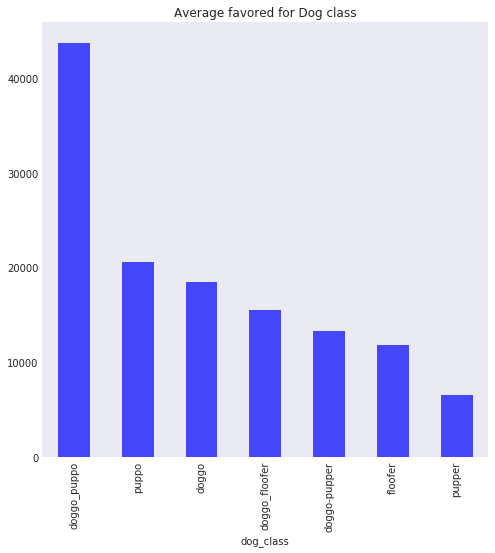

In [38]:
###### Plot average favored by dog class

dog_class=master_df[master_df['dog_class'] != 'Non'].groupby(['dog_class']).favorite_count.mean().sort_values(ascending=False)
dog_class.plot(kind='bar', title='Average favored for Dog class', color=['blue'], figsize=(8,8), alpha=.7)

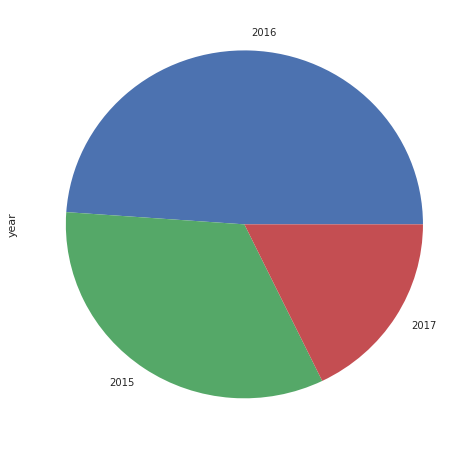

In [229]:
### plot number of entries/ year

ind=master_df['year'].value_counts().index
master_df['year'].value_counts()[ind].plot(kind='pie',figsize=(8,8))

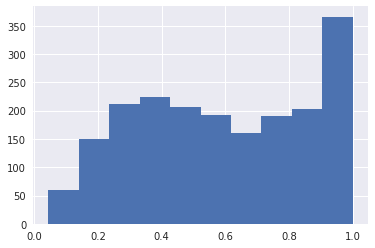

In [235]:
### plot Hist of confidence1
master_df.confidence1.hist()

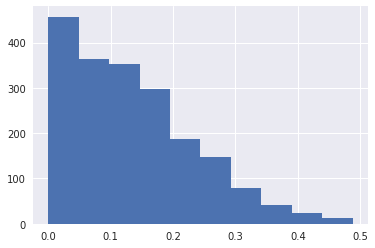

In [236]:
master_df.confidence2.hist()

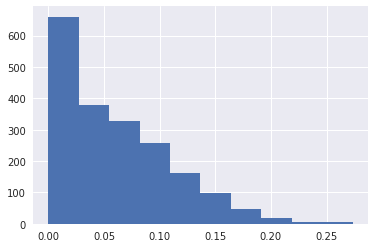

In [237]:
master_df.confidence3.hist()

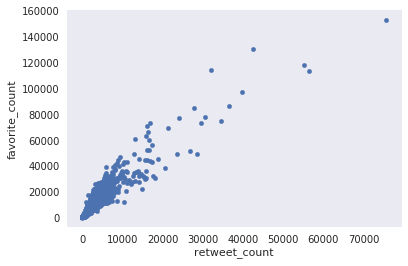

In [248]:
## Scatter between retweet_count ,favorite_count
master_df.plot.scatter(x='retweet_count',y='favorite_count')

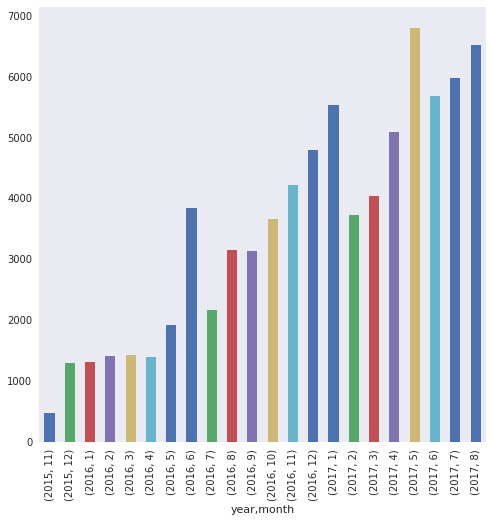

In [269]:
av_rating_numerator = master_df.groupby(['year','month']).retweet_count.mean()
av_rating_numerator.plot(kind='bar', figsize=(8,8))